In [107]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('deforestation_dataset.csv')

# Neste código, será utilizado uma base de dados do Kaggle sobre o desmatamento da Amazônia ao longo dos anos. Faremos o algoritmo aprender com base nos dados de 3 estados para prever o desmatamento total da Amazônia nos respectivos anos

In [108]:
dataset.head().T 

,0,1,2,3,4
Ano/Estados,2004,2005,2006,2007,2008
AC,728,592,398,184,254
AM,1232,775,788,610,604
AP,46,33,30,39,100
MA,755,922,674,631,1271
MT,11814,7145,4333,2678,3258
PA,8870,5899,5659,5526,5607
RO,3858,3244,2049,1611,1136
RR,311,133,231,309,574
TO,158,271,124,63,107


In [109]:
y = dataset['AMZ_LEGAL']
x = dataset[['AM', 'PA', 'MA']]

In [110]:
#x.shape

In [111]:
#y.shape

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, dataset.AMZ_LEGAL, test_size=0.5)
# Será utilizado 50% da nossa base de dados para o treinamento do algoritmo

In [113]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
# Utilizamos regressão linear no treinamento

In [114]:
lreg.fit(x_train,y_train)

LinearRegression()

In [115]:
pred = lreg.predict(x_test)

In [116]:
mse = np.mean((pred - y_test)**2)
mse
# Aqui temos o cálculo do MSE 

3141585.584708146

In [117]:
coeff = DataFrame(x_train.columns)
coeff['Coeficientes'] = Series(lreg.coef_)
coeff
# Coeficientes para calcular o valor predito

,0,Coeficientes
0,AM,3.305571
1,PA,3.090972
2,MA,-1.172213


In [118]:
lreg.score(x_test,y_test)
# Aqui está o calculo do R-Squared, pra medir o quão próximo os dados preditos estão da linha de regressão

0.5963530737654774

In [119]:
print(pred)
print(y_test.values)
# A primeira linha de vetores são os valores preditos, enquanto a segunda linha são dos valores reais

[ 9154.9464083  12752.30774173  3164.65273784  6862.6267123
 15676.3126783   5133.2191413   6888.35755894  9970.3980366 ]
[ 7000  9762  4571  6418 14286  6207  6947  7464]


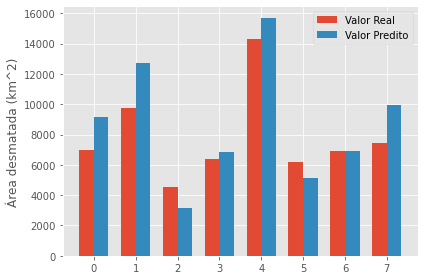

In [120]:
import matplotlib.pyplot as plt

%matplotlib inline

x = np.arange(len(pred))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test.values, width, label='Valor Real')
rects2 = ax.bar(x + width/2, pred, width, label='Valor Predito')

ax.set_ylabel('Área desmatada (km^2)')
ax.set_xticks(x)
ax.legend()



fig.tight_layout()

plt.show()

